## 3. Import the libraries you need for your analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

## 4. Find a JSON/GeoJSONfile containing location data that corresponds to the location data in your student project data

In [9]:
# Creating path
path = r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\DATA'

#Importing Data
listings = pd.read_csv(os.path.join(path, 'listings_cleaned.csv'), index_col = False)

# Importing GEOJSON
neighbourhoods = r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\DATA\neighbourhoods.geojson'

## 5. Wrangle your project data to meet the needs of your analysis. 

In [36]:
# Creating subset with the required columns

subset = listings[['neighbourhood_cleansed', 'latitude', 'longitude', 'price']]

In [38]:
subset.head()

,neighbourhood_cleansed,latitude,longitude,price
0,Centro,36.722069,-4.420914,178.0
1,Centro,36.727180,-4.413260,219.0
2,Centro,36.727710,-4.412884,141.0
3,Centro,36.719241,-4.420821,162.0
4,Palma-Palmilla,36.737370,-4.434390,53.0


In [44]:
# Checking neighbourhoods

subset['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Centro                  5618
Este                     879
Carretera de Cadiz       856
Cruz De Humilladero      424
Bailen-Miraflores        265
Churriana                149
Palma-Palmilla           117
Teatinos-Universidad     115
Ciudad Jardin             85
Puerto de la Torre        48
Campanillas               30
Name: count, dtype: int64

## 6. Clean your data set—watch for missing and extreme values.

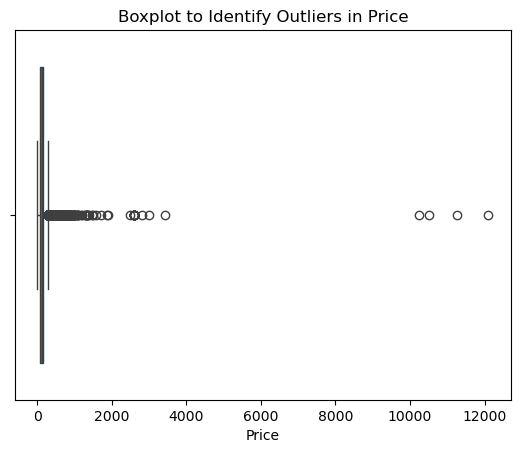

In [47]:
# Creating a boxplot to identify outliers in the 'price' column

sns.boxplot(data=subset, x='price')
plt.title('Boxplot to Identify Outliers in Price')
plt.xlabel('Price')
plt.show()

In [49]:
# Removing rows where 'price' is greater than 2000

subset = subset[subset['price'] <= 2000]

## 7. Create a choropleth map using a variable of your choice.

In [52]:
# Calculating average price by neighbourhood

avg_price_by_neighbourhood = subset.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

In [61]:
# Load the geojson file (assuming it is already imported and stored in `neighbourhoods`)
with open(neighbourhoods) as f:
    neighbourhood_geo = json.load(f)

# Setup a folium map centered around Malaga, Spain
map = folium.Map(location=[36.7213, -4.4214], zoom_start=12)  

# Adding the Choropleth layer
folium.Choropleth(
    geo_data=neighbourhood_geo,
    name='choropleth',
    data=avg_price_by_neighbourhood,
    columns=['neighbourhood_cleansed', 'price'],
    key_on='feature.properties.neighbourhood', 
    fill_color='YlOrRd',  
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Price per Neighbourhood'
).add_to(map)

folium.LayerControl().add_to(map)

# Save the map
map.save(r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\VISUALIZATIONS\neighbourhood_price_map.html')


## 8. Discuss the results and what they mean in a markdown section.

    Does the analysis answer any of your existing research questions?
    Does the analysis lead you to any new research questions?


#### The choropleth map displays the average price in each neighborhood, addressing one of the research questions:
#### "Are there specific neighborhoods with higher average property prices?"
#### It shows that, counterintuitively, the peripheral neighborhoods have a higher average price. This can be explained by the fact that properties in the city center, despite being more numerous and having closer access to various services and amenities, tend to be smaller in size. In future analyses, we can confirm this by including the number of bedrooms or property types.